In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
import statsmodels
import statsmodels.stats as stats
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re

from bokeh.io import output_notebook
from wordcloud import WordCloud
import matplotlib.pyplot as plt

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
text = pd.read_csv('sample.csv')

In [3]:
text.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


# Let's see if we have missing values 

In [4]:
percentage_missing = text.isnull().sum() * 100 / len(text)
missing_value_df = pd.DataFrame({'percent_missing': percentage_missing})
missing_value_df

,percent_missing
tweet_id,0.000000
author_id,0.000000
inbound,0.000000
created_at,0.000000
text,0.000000
response_tweet_id,30.107527
in_response_to_tweet_id,26.881720


# Data Cleaning

## 1) Remove all special characthers 

## 2) Get rid of all hyperlinks 

## 3) Make everything lowercase 

In [5]:
text['text'] = text['text'].str.replace('[#,@,&]', '')
text['text'] = text['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
text['text'] = text['text'].str.lower()
text['text']

/var/folders/5h/sssbdr315vq7qdzdtf7mlmc40000gn/T/ipykernel_11430/4269529290.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text['text'] = text['text'].str.replace('[#,@,&]', '')


0     applesupport causing the reply to be disregard...
1     105835 your business means a lot to us. please...
2     76328 i really hope you all change but i'm sur...
3            105836 livechat is online at the moment - 
4     virgintrains see attached error message. i've ...
                            ...                        
88    105860 i wish amazon had an option of where i ...
89                they reschedule my shit for tomorrow 
90    105861 hey sara sorry to hear of the issues yo...
91    tesco bit of both - finding the layout cumbers...
92    105861 if that doesn't help please dm your ful...
Name: text, Length: 93, dtype: object

## Wordclous are not Data Science

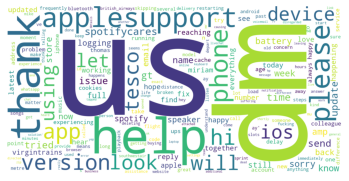

<Figure size 7200x720 with 0 Axes>

In [6]:
wc_text = text['text'].values

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(str(wc_text))

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize= (100,10), facecolor='k')
plt.show()

### So words such as "US," , "HELP", and "Thank" (presumably Thank You) are common but more pervasive to real analysis might be the hyper links within the text. 

## Let's lemmatize and tokenize our text

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize(text['text'])
#x = lemmatizer(text['text'])

In [ ]:
text['text']

In [ ]:
#df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['frases']), axis=1)
text['tokenized'] = text.apply(lambda row: nltk.word_tokenize(row[text['text']]), axis=1)